<a href="https://colab.research.google.com/github/oaarnikoivu/dissertation/blob/master/Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install transformers

In [0]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from transformers import BertTokenizer

In [0]:
file_path = '/content/drive/My Drive'

DATA_PATH = Path(file_path + '/datasets/SemEval')

train_data = pd.read_csv(DATA_PATH/'train.csv')
test_data = pd.read_csv(DATA_PATH/'test.csv')
val_data = pd.read_csv(DATA_PATH/'val.csv')

In [0]:
all_data = pd.concat([train_data, test_data, val_data])
all_data = all_data.drop('Unnamed: 0', axis=1)

In [126]:
all_data.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-En-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-En-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-En-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0
3,2017-En-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-En-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0


In [127]:
print("Number of rows in data=",all_data.shape[0])
print("Number of columns in data=",all_data.shape[1])

Number of rows in data= 10983
Number of columns in data= 13


In [128]:
all_data.iloc[:,2:].sum().values

array([3960, 1527, 4020, 1848, 4319, 1348, 3434, 1270, 3233,  566,  553])

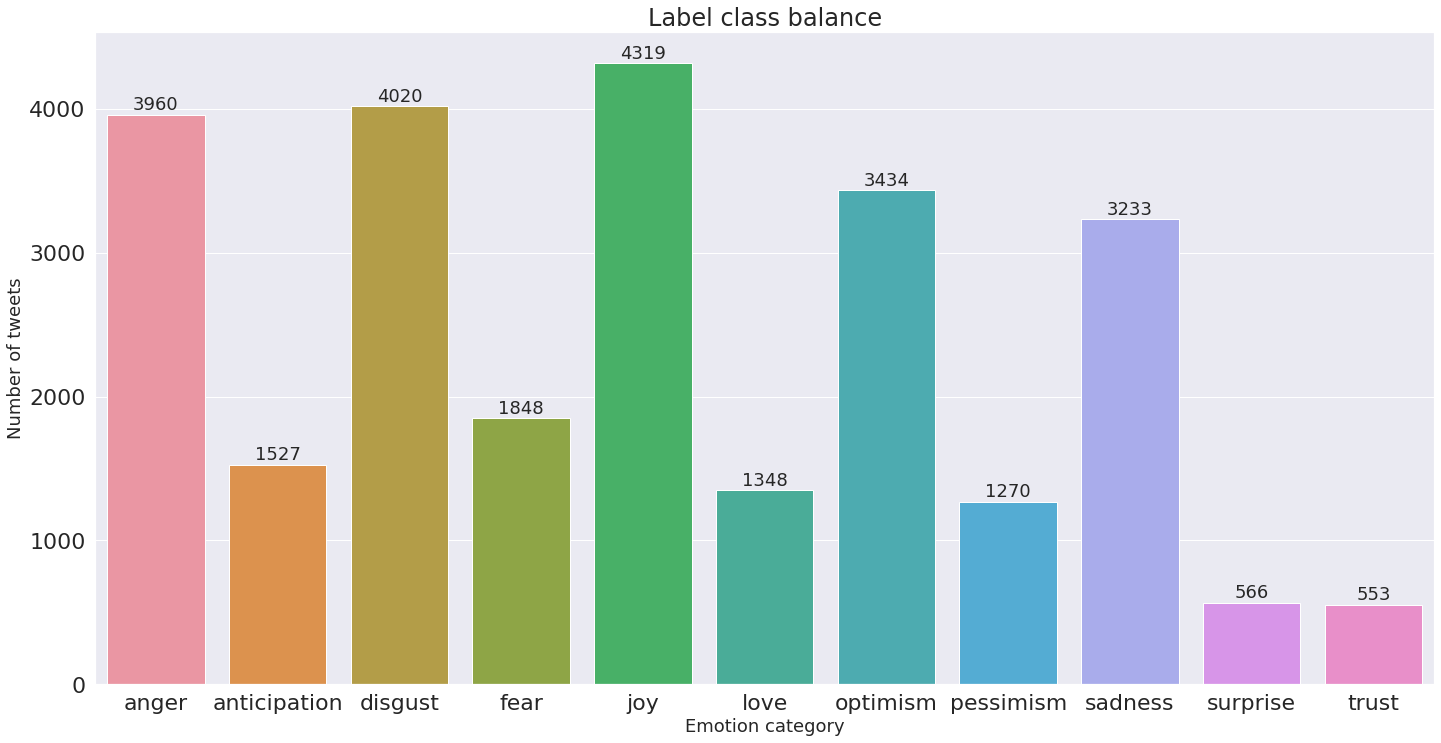

In [129]:
categories = list(all_data.columns.values[2:])
categories
sns.set(font_scale=2)
plt.figure(figsize=(24,12))

ax = sns.barplot(categories, all_data.iloc[:,2:].sum().values)

plt.title("Label class balance", fontsize=24)
plt.ylabel('Number of tweets', fontsize=18)
plt.xlabel('Emotion category', fontsize=18)

rects = ax.patches
labels = all_data.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha='center', va='bottom', fontsize=18)

plt.savefig('class_imbalance', dpi=300)
plt.show()

In [130]:
all_data['Tweet'][40:50]

40    All the young people are so bitter about how t...
41    Living with #depression doesn't mean you must ...
42    In wake of fresh #terror threat and sounding o...
43    @TamraBarney @ShannonBeador @RHOC_KellyDodd Ta...
44    He accusd India of HR violations in Kashmir BU...
45    About 7 weeks till I can pick up my camera aga...
46    @morgannbroom yes ❤️❤️ &amp; cheering homecomi...
47    I was so shy freshman year this guy introduced...
48    Love is when all your happiness and all your s...
49    @wabermes The @RavalliRepublic had a good one ...
Name: Tweet, dtype: object

In [131]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [158]:
tokenizer.encode('Rasberry milkshakes are amazing', add_special_tokens=True)

[101, 20710, 9766, 6501, 7377, 9681, 2024, 6429, 102]